In [1]:
import json
import numpy as np
from tensorflow.keras.models import load_model
import math
import sys
import librosa
import matplotlib.pyplot as plt


In [2]:
def mfcc_extractor(audio_file,track_duration):
    SAMPLE_RATE=22050
    NUM_MFCC=13
    HOP_LENGTH=512
    N_FFT=2048
    TRACK_DURATION=track_duration
    SAMPLE_PER_TRACK=SAMPLE_RATE*TRACK_DURATION
    NUM_SEGMENT=10
    samples_per_segment=int(SAMPLE_PER_TRACK/NUM_SEGMENT)
    num_mfcc_vectors_per_segment=math.ceil(samples_per_segment/HOP_LENGTH)
    
    signal,sr=librosa.load(audio_file,sr=SAMPLE_RATE,duration=35)
    
    for d in range(NUM_SEGMENT):
        start = samples_per_segment * d
        finish = start + samples_per_segment

        # extract mfcc
        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=SAMPLE_RATE, n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
        mfcc = mfcc.T

        # return only mfcc feature with expected number of vectors
        if len(mfcc) == num_mfcc_vectors_per_segment:
            return mfcc

In [7]:
model=load_model('./cnn_model.h5')

audio_file='./PSRV - Toca Raul - STUDIO RAW.wav'
with open('./genres_mapping.json','r') as f:
    music_genre=json.load(f)['mapping']

mfcc=mfcc_extractor(audio_file,30)

mfcc=mfcc[np.newaxis,...,np.newaxis]
predicted_result=model.predict(mfcc)

predicted_index=np.argmax(predicted_result)

print("genre of the song {} is {}".format(audio_file.split('/')[-1],music_genre[predicted_index]))

genre of the song PSRV - Toca Raul - STUDIO RAW.wav is blues


<BarContainer object of 10 artists>

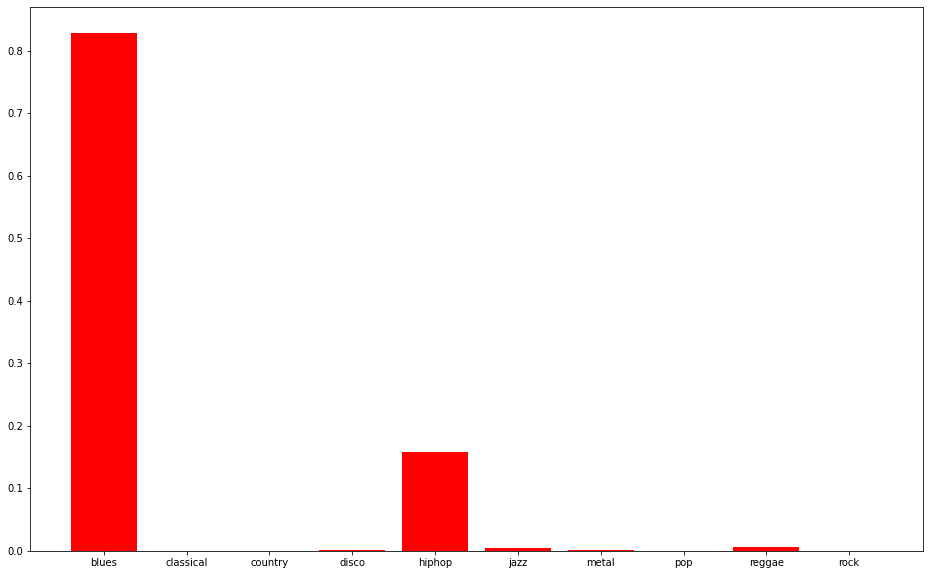

In [8]:
plt.figure(figsize=(16,10))
plt.bar(music_genre,predicted_result[0],color="r")

In [32]:
predicted_result.shape

(1, 10)